## 1. OrderBookPlots2007_df
##### read OrderLogs with OBPlot numbers produced by class OrderBookFiles2OrderBookPlots
## 2. obp_atts_2007
##### convert orderlog into edges abd find obplots by class OBPlots2OBPlots_Attributes(OrderBookPlots2007_df)
## 3. order_atts_2007_df = obp_atts2order_atts_df(obp_atts_2007.obp_atts_dic)
## 4. order_atts_cumsums_2007_df
##### add dynamic obp attribute cumsum columns by order_atts_df2order_atts_cumsums_df() (for convinient trade-day/OBPlots plots later)
## 5. obp_cum_atts_2007_df
##### obp cumulative attributes (BUYSELLYIELD, OBPTDVOLRATIO, MINMAXRATIO) by order_atts_df2obp_cum_atts_df()
## FINAL CHECK
##### compare to plots in OBPlots_Attributes_single_sec_day

## 1. OrderBookPlots2007_df
##### read OrderLogs with OBPlot numbers produced by class OrderBookFiles2OrderBookPlots
## 2. obp_atts_2007
##### convert orderlog into edges abd find obplots by class OBPlots2OBPlots_Attributes(OrderBookPlots2007_df)
## 3. order_atts_2007_df = obp_atts2order_atts_df(obp_atts_2007.obp_atts_dic)
## 4. order_atts_cumsums_2007_df
##### add dynamic obp attribute cumsum columns by order_atts_df2order_atts_cumsums_df() (for convinient trade-day/OBPlots plots later)
## 5. obp_cum_atts_2007_df
##### obp cumulative attributes (BUYSELLYIELD, OBPTDVOLRATIO, MINMAXRATIO) by order_atts_df2obp_cum_atts_df()
## FINAL CHECK
##### compare to plots in OBPlots_Attributes_single_sec_day

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## 1. OrderBookPlots2007_df
##### read OrderLogs with OBPlot numbers produced by class OrderBookFiles2OrderBookPlots

In [2]:
temp_df = pd.read_csv('./resources/LKOH_SBER_GMKN_2007_10.csv')
temp_df.drop(['Unnamed: 0'], axis=1, inplace=True)
temp_df = temp_df.astype({"NO":"int",
                          "SECCODE":"string",
                          "BUYSELL":"string",
                          "TIME":"string",
                          "ORDERNO":"int",
                          "ACTION":"int",
                          "PRICE":"float",
                          "VOLUME":"int",
                          "TRADENO":pd.Int64Dtype(),
                          "TRADEPRICE":"float",
                          "DATE":"string",
                          "OBPLOTNO":"int"
                         })
temp_df

,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE,OBPLOTNO
0,10,LKOH,S,103000000,10,1,2160.60,26,<NA>,NaN,2007-10-01,0
1,28,LKOH,S,103000000,28,1,2088.80,8,<NA>,NaN,2007-10-01,2
2,29,LKOH,S,103000000,29,1,2098.95,8,<NA>,NaN,2007-10-01,4
3,30,LKOH,S,103000000,30,1,2091.80,8,<NA>,NaN,2007-10-01,6
4,31,LKOH,S,103000000,31,1,2225.00,1,<NA>,NaN,2007-10-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...
6493782,972493,SBER03,B,174459000,407007,0,106.25,50,<NA>,NaN,2007-10-31,61905
6493783,972496,LKOH,S,174500000,423366,0,2239.97,91,<NA>,NaN,2007-10-31,58850
6493784,972500,SBER03,B,174500000,380835,0,105.92,10,<NA>,NaN,2007-10-31,58503
6493785,972501,LKOH,B,174500000,423342,0,2237.01,9,<NA>,NaN,2007-10-31,58844


In [3]:
temp_df.to_csv('./resources/for_web_app/L_S_G_2007_10_obps.csv', index=False)

In [4]:
OrderBookPlots2007_df = pd.read_csv('./resources/LKOH_SBER_GMKN_2007_10.csv')
# OrderBookPlots2007_df = OrderBookPlots2007_df[(OrderBookPlots2007_df.SECCODE.isin(['LKOH', 'GMKN']))
#                                                & (OrderBookPlots2007_df.DATE.isin(['2007-10-08', '2007-10-09']))]
# OrderBookPlots2007_df = OrderBookPlots2007_df[(OrderBookPlots2007_df.SECCODE.isin(['LKOH']))
#                                                & (OrderBookPlots2007_df.DATE.isin(['2007-10-08']))]
OrderBookPlots2007_df

,Unnamed: 0,NO,SECCODE,BUYSELL,TIME,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE,OBPLOTNO
0,9,10,LKOH,S,103000000,10,1,2160.60,26,NaN,NaN,2007-10-01,0
1,27,28,LKOH,S,103000000,28,1,2088.80,8,NaN,NaN,2007-10-01,2
2,28,29,LKOH,S,103000000,29,1,2098.95,8,NaN,NaN,2007-10-01,4
3,29,30,LKOH,S,103000000,30,1,2091.80,8,NaN,NaN,2007-10-01,6
4,30,31,LKOH,S,103000000,31,1,2225.00,1,NaN,NaN,2007-10-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493782,972492,972493,SBER03,B,174459000,407007,0,106.25,50,NaN,NaN,2007-10-31,61905
6493783,972495,972496,LKOH,S,174500000,423366,0,2239.97,91,NaN,NaN,2007-10-31,58850
6493784,972499,972500,SBER03,B,174500000,380835,0,105.92,10,NaN,NaN,2007-10-31,58503
6493785,972500,972501,LKOH,B,174500000,423342,0,2237.01,9,NaN,NaN,2007-10-31,58844


In [5]:
OrderBookPlots2007_df['TRADENO'] = OrderBookPlots2007_df['TRADENO'].astype(pd.Int64Dtype())

In [6]:
OrderBookPlots2007_df.sort_values(by=['NO'], inplace=True)

In [7]:
def form_datetimemlls(df):
    scnd_size_df = pd.DataFrame(df.groupby('TIME').size())
    scnd_size_df.reset_index(inplace=True)
    scnd_size_df = scnd_size_df.rename(columns = {0:'SCNDSIZE'})
    df = df.merge(scnd_size_df, on='TIME')
    df['SEC_IND'] = df.groupby(['TIME']).cumcount()
    df['MILLISS'] = round(df['SEC_IND'] / df['SCNDSIZE'] * 1000)
    df['MILLISS'] = df['MILLISS'].astype(int)
    df.drop(['SCNDSIZE', 'SEC_IND'], axis=1, inplace=True)
    df['DATETIME'] = df.apply(lambda row: datetime.datetime.strptime(row.DATE, '%Y-%m-%d'), axis=1)
    df['DATETIMEMLLS'] = df.apply(lambda row: datetime.datetime(row.DATETIME.year,
                                                               row.DATETIME.month,
                                                               row.DATETIME.day,
                                                               int(row.TIME // 1e7),
                                                               int((row.TIME // 1e5) % 100),
                                                               int((row.TIME // 1e3) % 100)),
                                  axis=1)
    df['DATETIMEMLLS'] = df.apply(lambda row: row.DATETIMEMLLS +
                                 datetime.timedelta(milliseconds=row.MILLISS),
                                 axis=1)
    df.drop(['DATETIME', 'MILLISS', 'TIME'], axis=1, inplace=True)
    return(df)

In [8]:
OrderBookPlots2007_df = form_datetimemlls(OrderBookPlots2007_df)
OrderBookPlots2007_df

,Unnamed: 0,NO,SECCODE,BUYSELL,ORDERNO,ACTION,PRICE,VOLUME,TRADENO,TRADEPRICE,DATE,OBPLOTNO,DATETIMEMLLS
0,0,1,SBER03,S,1,1,115.00,4000,<NA>,NaN,2007-10-23,0,2007-10-23 10:30:00.000
1,0,1,LKOH,S,1,1,2240.00,10,<NA>,NaN,2007-10-12,0,2007-10-12 10:30:00.000
2,1,2,LKOH,B,2,1,1950.00,2,<NA>,NaN,2007-10-22,0,2007-10-22 10:30:00.000
3,2,3,LKOH,S,3,1,2160.60,26,<NA>,NaN,2007-10-02,0,2007-10-02 10:30:00.000
4,4,5,LKOH,S,5,1,2425.80,50,<NA>,NaN,2007-10-30,0,2007-10-30 10:30:00.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493782,1069983,1069984,GMKN,S,453101,1,6648.98,94,<NA>,NaN,2007-10-02,97893,2007-10-02 17:26:34.973
6493783,1069994,1069995,GMKN,S,382054,0,6742.00,41,<NA>,NaN,2007-10-02,83242,2007-10-02 17:26:34.978
6493784,1069997,1069998,GMKN,S,452958,0,6654.99,338,<NA>,NaN,2007-10-02,97850,2007-10-02 17:26:34.984
6493785,1069998,1069999,GMKN,S,451475,0,6669.98,15,<NA>,NaN,2007-10-02,97452,2007-10-02 17:26:34.989


In [9]:
class OBPlots2OBPlots_Attributes:
    def __init__(self, OBPs_df):
        self.OBPs_df = OBPs_df
        self.secs = pd.unique(self.OBPs_df.SECCODE)
        self.dates = pd.unique(self.OBPs_df.DATE)
#         print(self.dates)
        self.obplotnos = pd.unique(self.OBPs_df.OBPLOTNO)
        self.obp_atts_dic = {
            sec:datedic for (sec, datedic) in zip(
                self.secs,
                [{
                    date:obps_attsdic for (date, obps_attsdic) in zip(
                        self.dates, 
                        [{} for i in range(len(self.dates))]
                    )
                } for i in range(len(self.secs))]
            )
        }
        self.iterate_ob_rows()
    
    # Accordin to specs ACTION 0 shows balance of order, not cancelled volune of the order, IT'S WRONG
    # Actually, it shows cancelled volune of the order
    def ob2curatt(self, SECCODE, DATE, OBPLOTNO, BUYSELL, ACTION, PRICE, VOLUME, TRADEPRICE):
        if (BUYSELL == 'B') & (ACTION == 0):
            CBOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] -= VOLUME
            return({'ATT': 'CBOVOL', 'VAL': CBOVOL})
        elif (BUYSELL == 'S') & (ACTION == 0):
            CSOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] += VOLUME
            return({'ATT': 'CSOVOL', 'VAL': CSOVOL})
        elif (BUYSELL == 'B') & (ACTION == 1):
            BOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] += VOLUME

#             print(SECCODE, DATE, OBPLOTNO, BOVOL)
#             input("Read")
            
            return({'ATT': 'BOVOL', 'VAL': BOVOL})
        elif (BUYSELL == 'S') & (ACTION == 1):
            SOVOL = PRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] -= VOLUME
            return({'ATT': 'SOVOL', 'VAL': SOVOL})
        elif (BUYSELL == 'B') & (ACTION == 2):
            BTVOL = TRADEPRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] -= VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['BPROFIT'] += (TRADEPRICE - PRICE) * VOLUME
            if TRADEPRICE < self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE'] = TRADEPRICE
            elif TRADEPRICE > self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE'] = TRADEPRICE
            return({'ATT': 'BTVOL', 'VAL': BTVOL})
        elif (BUYSELL == 'S') & (ACTION == 2):
            STVOL = TRADEPRICE * VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] += VOLUME
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SPROFIT'] += (PRICE - TRADEPRICE) * VOLUME
            if TRADEPRICE < self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE'] = TRADEPRICE
            elif TRADEPRICE > self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE']:
                self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE'] = TRADEPRICE
            return({'ATT': 'STVOL', 'VAL': STVOL})
        
    def ob_row2obp_atts(self, SECCODE, DATE, NO, BUYSELL, ORDERNO,
                        ACTION, PRICE, VOLUME, TRADEPRICE, OBPLOTNO,
                        DATETIMEMLLS):
        if OBPLOTNO not in self.obp_atts_dic[SECCODE][DATE]:
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO] = {}
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SHAREBAL'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['BPROFIT'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['SPROFIT'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE'] = 0
            self.obp_atts_dic[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE'] = 0

#         print(SECCODE, DATE, OBPLOTNO, BUYSELL, ACTION, PRICE, VOLUME, TRADEPRICE)
#         input("Read")
            
        self.obp_atts_dic[SECCODE][DATE][OBPLOTNO][NO] = self.ob2curatt(SECCODE, DATE, OBPLOTNO, BUYSELL, ACTION, 
                                                                    PRICE, VOLUME, TRADEPRICE)
        self.obp_atts_dic[SECCODE][DATE][OBPLOTNO][NO]['DATETIMEMLLS'] = DATETIMEMLLS
#         print(SECCODE)
#         print(self.obp_atts[SECCODE])
        
    def iterate_ob_rows(self):
        [self.ob_row2obp_atts(SECCODE, DATE, NO, BUYSELL, ORDERNO, 
                              ACTION, PRICE, VOLUME, TRADEPRICE, OBPLOTNO,
                              DATETIMEMLLS)
        for (SECCODE, DATE, NO, BUYSELL, ORDERNO,
             ACTION, PRICE, VOLUME, TRADEPRICE, OBPLOTNO,
             DATETIMEMLLS)
         in zip(self.OBPs_df.SECCODE,
                self.OBPs_df.DATE,
                self.OBPs_df.NO,
                self.OBPs_df.BUYSELL,
                self.OBPs_df.ORDERNO,
                self.OBPs_df.ACTION,
                self.OBPs_df.PRICE,
                self.OBPs_df.VOLUME,
                self.OBPs_df.TRADEPRICE,
                self.OBPs_df.OBPLOTNO,
                self.OBPs_df.DATETIMEMLLS)]

In [10]:
def obp_atts2order_atts_df(obp_atts):
    order_atts_dic = {}
    for SECCODE in obp_atts:
        for DATE in obp_atts[SECCODE]:
            for OBPLOTNO in obp_atts[SECCODE][DATE]:
                for NO in obp_atts[SECCODE][DATE][OBPLOTNO]:
                    order_atts_dic[(DATE, NO)] = {}
                    if (NO != 'SHAREBAL') & (NO != 'BPROFIT') & (NO != 'SPROFIT') & (NO != 'OBPMINTPRICE') & (NO != 'OBPMAXTPRICE'):
                        order_atts_dic[(DATE, NO)] = obp_atts[SECCODE][DATE][OBPLOTNO][NO]
                        order_atts_dic[(DATE, NO)]['NO'] = NO
                        order_atts_dic[(DATE, NO)]['OBPLOTNO'] = OBPLOTNO
                        order_atts_dic[(DATE, NO)]['DATE'] = DATE
                        order_atts_dic[(DATE, NO)]['SECCODE'] = SECCODE
                        order_atts_dic[(DATE, NO)]['SHAREBAL'] = obp_atts[SECCODE][DATE][OBPLOTNO]['SHAREBAL']
                        order_atts_dic[(DATE, NO)]['BPROFIT'] = obp_atts[SECCODE][DATE][OBPLOTNO]['BPROFIT']
                        order_atts_dic[(DATE, NO)]['SPROFIT'] = obp_atts[SECCODE][DATE][OBPLOTNO]['SPROFIT']
                        order_atts_dic[(DATE, NO)]['OBPMINTPRICE'] = obp_atts[SECCODE][DATE][OBPLOTNO]['OBPMINTPRICE']
                        order_atts_dic[(DATE, NO)]['OBPMAXTPRICE'] = obp_atts[SECCODE][DATE][OBPLOTNO]['OBPMAXTPRICE']

    order_atts_df = pd.DataFrame.from_dict(order_atts_dic, "index")
    order_atts_df.sort_values(by=['DATETIMEMLLS', 'NO'], inplace=True)
    order_atts_df.reset_index(inplace=True)
    return(order_atts_df)

## 2. obp_atts_2007
##### convert orderlog into edges abd find obplots by class OBPlots2OBPlots_Attributes(OrderBookPlots2007_df)

In [11]:
obp_atts_2007 = OBPlots2OBPlots_Attributes(OrderBookPlots2007_df)
print(len(obp_atts_2007.obp_atts_dic['LKOH']['2007-10-08']))

19721


## 3. order_atts_2007_df = obp_atts2order_atts_df(obp_atts_2007.obp_atts_dic)

In [12]:
order_atts_2007_df = obp_atts2order_atts_df(obp_atts_2007.obp_atts_dic)
order_atts_2007_df

,level_0,level_1,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,BPROFIT,SPROFIT,OBPMINTPRICE,OBPMAXTPRICE
0,2007-10-01,10,SOVOL,56175.60,2007-10-01 10:30:00.000,10,0,2007-10-01,LKOH,-26,0.0,0.0,0,0.0
1,2007-10-01,28,SOVOL,16710.40,2007-10-01 10:30:00.001,28,2,2007-10-01,LKOH,-8,0.0,0.0,0,0.0
2,2007-10-01,29,SOVOL,16791.60,2007-10-01 10:30:00.001,29,4,2007-10-01,LKOH,-8,0.0,0.0,0,0.0
3,2007-10-01,30,SOVOL,16734.40,2007-10-01 10:30:00.001,30,6,2007-10-01,LKOH,-8,0.0,0.0,0,0.0
4,2007-10-01,31,SOVOL,2225.00,2007-10-01 10:30:00.001,31,8,2007-10-01,LKOH,-1,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493782,2007-10-31,972493,CBOVOL,5312.50,2007-10-31 17:44:59.611,972493,61905,2007-10-31,SBER03,0,0.0,0.0,0,0.0
6493783,2007-10-31,972496,CSOVOL,203837.27,2007-10-31 17:45:00.622,972496,58850,2007-10-31,LKOH,0,0.0,0.0,0,0.0
6493784,2007-10-31,972500,CBOVOL,1059.20,2007-10-31 17:45:00.644,972500,58503,2007-10-31,SBER03,0,0.0,0.0,0,0.0
6493785,2007-10-31,972501,CBOVOL,20133.09,2007-10-31 17:45:00.667,972501,58844,2007-10-31,LKOH,0,0.0,0.0,0,0.0


In [13]:
def order_atts_df2order_atts_cumsums_df(df, CBOVOLcs, CSOVOLcs, BOVOLcs, SOVOLcs, BTVOLcs, STVOLcs, grby = ['SECCODE', 'DATE']):
    # cumsums
    df[CBOVOLcs] = df[df.ATT == 'CBOVOL'].groupby(grby)['VAL'].cumsum()
    df[CSOVOLcs] = df[df.ATT == 'CSOVOL'].groupby(grby)['VAL'].cumsum()
    df[BOVOLcs] = df[df.ATT == 'BOVOL'].groupby(grby)['VAL'].cumsum()
    
#     if BOVOLcs == 'BOVOLobpcs':
#         print(df.head(20)[BOVOLcs])
#         input("Read")

    df[SOVOLcs] = df[df.ATT == 'SOVOL'].groupby(grby)['VAL'].cumsum()
    df[BTVOLcs] = df[df.ATT == 'BTVOL'].groupby(grby)['VAL'].cumsum()
    df[STVOLcs] = df[df.ATT == 'STVOL'].groupby(grby)['VAL'].cumsum()

    df[[CBOVOLcs,
       CSOVOLcs,
       BOVOLcs,
       SOVOLcs,
       BTVOLcs,
       STVOLcs]] = df.groupby(['SECCODE', 'DATE'])[[CBOVOLcs, #https://stackoverflow.com/questions/46391128/pandas-fillna-using-groupby
                       CSOVOLcs,
                       BOVOLcs,
                       SOVOLcs,
                       BTVOLcs,
                       STVOLcs]].fillna(method="ffill")
    df[[CBOVOLcs,
       CSOVOLcs,
       BOVOLcs,
       SOVOLcs,
       BTVOLcs,
       STVOLcs]] = df.groupby(['SECCODE', 'DATE'])[[CBOVOLcs,
                       CSOVOLcs,
                       BOVOLcs,
                       SOVOLcs,
                       BTVOLcs,
                       STVOLcs]].fillna(value = 0.0)
    return(df)

## 4. order_atts_cumsums_2007_df
##### add dynamic obp attribute cumsum columns by order_atts_df2order_atts_cumsums_df() (for convinient trade-day/OBPlots plots later)

In [14]:
order_atts_cumsums_2007_df = order_atts_df2order_atts_cumsums_df(order_atts_2007_df, 'CBOVOLtdcs', 'CSOVOLtdcs', 'BOVOLtdcs', 
                              'SOVOLtdcs', 'BTVOLtdcs', 'STVOLtdcs', grby = ['SECCODE', 'DATE'])
order_atts_cumsums_2007_df

,level_0,level_1,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,BPROFIT,SPROFIT,OBPMINTPRICE,OBPMAXTPRICE,CBOVOLtdcs,CSOVOLtdcs,BOVOLtdcs,SOVOLtdcs,BTVOLtdcs,STVOLtdcs
0,2007-10-01,10,SOVOL,56175.60,2007-10-01 10:30:00.000,10,0,2007-10-01,LKOH,-26,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,5.617560e+04,0.000000e+00,0.000000e+00
1,2007-10-01,28,SOVOL,16710.40,2007-10-01 10:30:00.001,28,2,2007-10-01,LKOH,-8,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,7.288600e+04,0.000000e+00,0.000000e+00
2,2007-10-01,29,SOVOL,16791.60,2007-10-01 10:30:00.001,29,4,2007-10-01,LKOH,-8,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.967760e+04,0.000000e+00,0.000000e+00
3,2007-10-01,30,SOVOL,16734.40,2007-10-01 10:30:00.001,30,6,2007-10-01,LKOH,-8,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.064120e+05,0.000000e+00,0.000000e+00
4,2007-10-01,31,SOVOL,2225.00,2007-10-01 10:30:00.001,31,8,2007-10-01,LKOH,-1,0.0,0.0,0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.086370e+05,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493782,2007-10-31,972493,CBOVOL,5312.50,2007-10-31 17:44:59.611,972493,61905,2007-10-31,SBER03,0,0.0,0.0,0,0.0,4.599167e+09,5.121010e+09,1.099837e+10,1.199824e+10,6.184459e+09,6.184459e+09
6493783,2007-10-31,972496,CSOVOL,203837.27,2007-10-31 17:45:00.622,972496,58850,2007-10-31,LKOH,0,0.0,0.0,0,0.0,6.524680e+09,5.120393e+09,1.302710e+10,1.139832e+10,6.051871e+09,6.051871e+09
6493784,2007-10-31,972500,CBOVOL,1059.20,2007-10-31 17:45:00.644,972500,58503,2007-10-31,SBER03,0,0.0,0.0,0,0.0,4.599168e+09,5.121010e+09,1.099837e+10,1.199824e+10,6.184459e+09,6.184459e+09
6493785,2007-10-31,972501,CBOVOL,20133.09,2007-10-31 17:45:00.667,972501,58844,2007-10-31,LKOH,0,0.0,0.0,0,0.0,6.524701e+09,5.120393e+09,1.302710e+10,1.139832e+10,6.051871e+09,6.051871e+09


In [15]:
order_atts_cumsums_2007_df = order_atts_df2order_atts_cumsums_df(order_atts_cumsums_2007_df, 'CBOVOLobpcs', 'CSOVOLobpcs', 'BOVOLobpcs', 
                              'SOVOLobpcs', 'BTVOLobpcs', 'STVOLobpcs', grby = ['SECCODE', 'DATE', 'OBPLOTNO'])
order_atts_cumsums_2007_df

,level_0,level_1,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,...,BOVOLtdcs,SOVOLtdcs,BTVOLtdcs,STVOLtdcs,CBOVOLobpcs,CSOVOLobpcs,BOVOLobpcs,SOVOLobpcs,BTVOLobpcs,STVOLobpcs
0,2007-10-01,10,SOVOL,56175.60,2007-10-01 10:30:00.000,10,0,2007-10-01,LKOH,-26,...,0.000000e+00,5.617560e+04,0.000000e+00,0.000000e+00,0.00,0.00,0.0,56175.60,0.00,0.00
1,2007-10-01,28,SOVOL,16710.40,2007-10-01 10:30:00.001,28,2,2007-10-01,LKOH,-8,...,0.000000e+00,7.288600e+04,0.000000e+00,0.000000e+00,0.00,0.00,0.0,16710.40,0.00,0.00
2,2007-10-01,29,SOVOL,16791.60,2007-10-01 10:30:00.001,29,4,2007-10-01,LKOH,-8,...,0.000000e+00,8.967760e+04,0.000000e+00,0.000000e+00,0.00,0.00,0.0,16791.60,0.00,0.00
3,2007-10-01,30,SOVOL,16734.40,2007-10-01 10:30:00.001,30,6,2007-10-01,LKOH,-8,...,0.000000e+00,1.064120e+05,0.000000e+00,0.000000e+00,0.00,0.00,0.0,16734.40,0.00,0.00
4,2007-10-01,31,SOVOL,2225.00,2007-10-01 10:30:00.001,31,8,2007-10-01,LKOH,-1,...,0.000000e+00,1.086370e+05,0.000000e+00,0.000000e+00,0.00,0.00,0.0,2225.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493782,2007-10-31,972493,CBOVOL,5312.50,2007-10-31 17:44:59.611,972493,61905,2007-10-31,SBER03,0,...,1.099837e+10,1.199824e+10,6.184459e+09,6.184459e+09,5312.50,533750.00,106450.0,1740789.81,35457.84,35457.84
6493783,2007-10-31,972496,CSOVOL,203837.27,2007-10-31 17:45:00.622,972496,58850,2007-10-31,LKOH,0,...,1.302710e+10,1.139832e+10,6.051871e+09,6.051871e+09,2235000.00,203837.27,0.0,0.00,17896.08,17896.08
6493784,2007-10-31,972500,CBOVOL,1059.20,2007-10-31 17:45:00.644,972500,58503,2007-10-31,SBER03,0,...,1.099837e+10,1.199824e+10,6.184459e+09,6.184459e+09,1059.20,533750.00,106450.0,1740789.81,35457.84,35457.84
6493785,2007-10-31,972501,CBOVOL,20133.09,2007-10-31 17:45:00.667,972501,58844,2007-10-31,LKOH,0,...,1.302710e+10,1.139832e+10,6.051871e+09,6.051871e+09,20133.09,203837.27,0.0,0.00,17896.08,17896.08


In [17]:
def order_atts_df2obp_cum_atts_df(order_atts_df):
    def buy_sell_obp(gr):
        buy_minus_sell_vol = gr[gr.ATT == 'BOVOL']['VAL'].sum() - gr[gr.ATT == 'SOVOL']['VAL'].sum()
        if buy_minus_sell_vol > 0:
            return('B')
        elif buy_minus_sell_vol < 0:
            return('S')
        else:
            return('N')
    def trades_notrades(gr):
        trades_count = gr[gr.ATT == 'BTVOL'].size + gr[gr.ATT == 'STVOL'].size
        if trades_count != 0:
            return('T')
        else:
            return('N')
    def obp_buysellyield(gr):
        if trades_notrades(gr) == 'T':
            b_obp_yield = gr.BPROFIT * 100 / gr[gr.ATT == 'BTVOL']['VAL'].sum()
            s_obp_yield = gr.SPROFIT * 100 / gr[gr.ATT == 'STVOL']['VAL'].sum()
            if buy_sell_obp(gr) == 'B':
                return(list(b_obp_yield - s_obp_yield)[0])
            elif buy_sell_obp(gr) == 'S':
                return(list(s_obp_yield - b_obp_yield)[0])
    def obp_td_vol_ratio(gr):
#         if list(gr.SECCODE)[0] == 'LKOH':
#             print(gr)
#             input("Read")
        volratio = ((gr.BOVOLobpcs.sum() 
                    - gr.CBOVOLobpcs.sum() 
                    - gr.BTVOLobpcs.sum() 
                    - gr.BPROFIT.sum() 
                    + gr.SOVOLobpcs.sum() 
                    - gr.CSOVOLobpcs.sum() 
                    - gr.STVOLobpcs.sum() 
                    - gr.SPROFIT.sum()) 
                    / (gr.BOVOLtdcs.sum() - 
                       gr.CBOVOLtdcs.sum() - 
                       gr.BTVOLtdcs.sum() - 
                       gr.BPROFIT.sum() + 
                       gr.SOVOLtdcs.sum() - 
                       gr.CSOVOLtdcs.sum() - 
                       gr.STVOLtdcs.sum() - 
                       gr.SPROFIT.sum()))
        return(abs(volratio))
    def minmax_dur_tdvol_ratio(gr):
#         delta = max(gr.DATETIMEMLLS) - min(gr.DATETIMEMLLS)
#         delta = delta.total_seconds()
#         print("=============")
#         print(delta)
        minmaxratio = gr.OBPMAXTPRICE - gr.OBPMINTPRICE
        return(abs(list(minmaxratio)[0]))
    def obp_trade_vol(gr):
        trade_vol = gr[(gr.ATT == 'BTVOL') | (gr.ATT == 'STVOL')].VAL.sum()
        return(trade_vol)
        
    buy_sell_obp_ser = order_atts_df.groupby(['SECCODE', 'DATE', 'OBPLOTNO']).apply(lambda gr: buy_sell_obp(gr))
    trades_notrades_ser = order_atts_df.groupby(['SECCODE', 'DATE', 'OBPLOTNO']).apply(lambda gr: trades_notrades(gr))
    obp_yield_ser = order_atts_df.groupby(['SECCODE', 'DATE', 'OBPLOTNO']).apply(lambda gr: obp_buysellyield(gr))
    obp_td_vol_ratio_ser = order_atts_df.groupby(['SECCODE','DATE',  'OBPLOTNO']).apply(lambda gr: obp_td_vol_ratio(gr))
    minmax_dur_tdvol_ratio_ser = order_atts_df.groupby(['SECCODE', 'DATE', 'OBPLOTNO']).apply(lambda gr: minmax_dur_tdvol_ratio(gr))
    obp_trade_vol_ser = order_atts_df.groupby(['SECCODE', 'DATE', 'OBPLOTNO']).apply(lambda gr: obp_trade_vol(gr))
    
    df = pd.DataFrame.from_dict({'TRADEVOL': obp_trade_vol_ser, 'BUYSELLOBP': buy_sell_obp_ser, 
                                 'TRADESNOTRADES': trades_notrades_ser, 'BUYSELLYIELD': obp_yield_ser,
                                 'OBPTDVOLRATIO': obp_td_vol_ratio_ser, 'MINMAXRATIO': minmax_dur_tdvol_ratio_ser})
    df.reset_index(inplace=True)
    return(df)

## 5. obp_cum_atts_2007_df
##### obp cumulative attributes (BUYSELLYIELD, OBPTDVOLRATIO, MINMAXRATIO) by order_atts_df2obp_cum_atts_df()

In [18]:
obp_cum_atts_2007_df = order_atts_df2obp_cum_atts_df(order_atts_cumsums_2007_df)
obp_cum_atts_2007_df

,SECCODE,DATE,OBPLOTNO,TRADEVOL,BUYSELLOBP,TRADESNOTRADES,BUYSELLYIELD,OBPTDVOLRATIO,MINMAXRATIO
0,GMKN,2007-10-01,0,0.0,B,N,NaN,1.000000,0.0
1,GMKN,2007-10-01,2,0.0,B,N,NaN,0.007021,0.0
2,GMKN,2007-10-01,4,0.0,S,N,NaN,0.950475,0.0
3,GMKN,2007-10-01,6,0.0,B,N,NaN,0.104737,0.0
4,GMKN,2007-10-01,8,0.0,B,N,NaN,0.103546,0.0
...,...,...,...,...,...,...,...,...,...
1164648,SBER03,2007-10-31,63626,0.0,B,N,NaN,0.001525,0.0
1164649,SBER03,2007-10-31,63630,0.0,B,N,NaN,0.000990,0.0
1164650,SBER03,2007-10-31,63632,0.0,B,N,NaN,0.000143,0.0
1164651,SBER03,2007-10-31,63634,0.0,S,N,NaN,0.000190,0.0


In [19]:
# delete obplots without trades
# obp_cum_atts_2007_df = obp_cum_atts_2007_df[obp_cum_atts_2007_df.TRADESNOTRADES != 'N']
# obp_cum_atts_2007_df

In [20]:
# obp_cum_atts_2007_df = obp_cum_atts_2007_df.dropna()
# obp_cum_atts_2007_df


## FINAL CHECK
##### compare to plots in OBPlots_Attributes_single_sec_day

In [21]:
obp_cum_atts_2007_LKOH_08_df = obp_cum_atts_2007_df[(obp_cum_atts_2007_df.SECCODE == 'LKOH') & 
                                                          (obp_cum_atts_2007_df.DATE == '2007-10-08')]
obp_cum_atts_2007_LKOH_08_df

,SECCODE,DATE,OBPLOTNO,TRADEVOL,BUYSELLOBP,TRADESNOTRADES,BUYSELLYIELD,OBPTDVOLRATIO,MINMAXRATIO
595676,LKOH,2007-10-08,0,0.0,S,N,NaN,0.006834,0.00
595677,LKOH,2007-10-08,2,0.0,S,N,NaN,0.002262,0.00
595678,LKOH,2007-10-08,4,0.0,B,N,NaN,0.008977,0.00
595679,LKOH,2007-10-08,6,0.0,S,N,NaN,0.008207,0.00
595680,LKOH,2007-10-08,8,0.0,B,N,NaN,0.000010,0.00
...,...,...,...,...,...,...,...,...,...
615392,LKOH,2007-10-08,79307,0.0,S,N,NaN,0.005897,0.00
615393,LKOH,2007-10-08,79314,0.0,B,N,NaN,0.022152,0.00
615394,LKOH,2007-10-08,79320,108769.0,B,T,100.0,0.011708,2175.38
615395,LKOH,2007-10-08,79324,413345.2,B,T,100.0,0.001598,2175.60


(array([159.,  14.,  40.,  31., 569., 950.,  46.,  38.,  18., 163.]),
 array([-1.00000000e+02, -8.00000000e+01, -6.00000000e+01, -4.00000000e+01,
        -2.00000000e+01,  1.42108547e-14,  2.00000000e+01,  4.00000000e+01,
         6.00000000e+01,  8.00000000e+01,  1.00000000e+02]),
 <BarContainer object of 10 artists>)

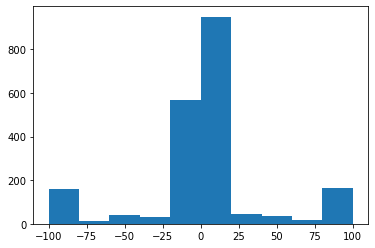

In [22]:
plt.hist(obp_cum_atts_2007_LKOH_08_df.BUYSELLYIELD)

(array([1.9029e+04, 4.2800e+02, 1.1900e+02, 4.9000e+01, 6.1000e+01,
        5.0000e+00, 9.0000e+00, 6.0000e+00, 7.0000e+00, 8.0000e+00]),
 array([8.17142455e-07, 9.78134647e-02, 1.95626112e-01, 2.93438760e-01,
        3.91251408e-01, 4.89064055e-01, 5.86876703e-01, 6.84689350e-01,
        7.82501998e-01, 8.80314645e-01, 9.78127293e-01]),
 <BarContainer object of 10 artists>)

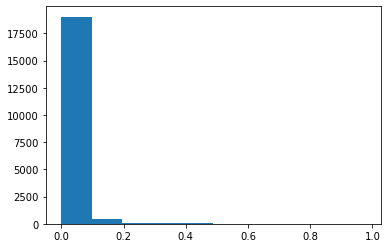

In [23]:
plt.hist(obp_cum_atts_2007_LKOH_08_df.OBPTDVOLRATIO)

(array([17546.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2175.]),
 array([   0. ,  219.6,  439.2,  658.8,  878.4, 1098. , 1317.6, 1537.2,
        1756.8, 1976.4, 2196. ]),
 <BarContainer object of 10 artists>)

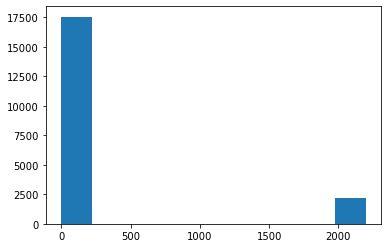

In [24]:
plt.hist(obp_cum_atts_2007_LKOH_08_df.MINMAXRATIO)

In [25]:
obp_cum_atts_2007_LKOH_08_df.sort_values(by='TRADEVOL', ascending=False)

,SECCODE,DATE,OBPLOTNO,TRADEVOL,BUYSELLOBP,TRADESNOTRADES,BUYSELLYIELD,OBPTDVOLRATIO,MINMAXRATIO
596442,LKOH,2007-10-08,1869,7.131710e+08,S,T,-11.245832,0.129567,2193.65
595702,LKOH,2007-10-08,52,4.233004e+08,B,T,0.548730,0.013828,2153.05
596826,LKOH,2007-10-08,3189,3.638484e+08,S,T,-0.555495,0.001384,2182.18
599609,LKOH,2007-10-08,14909,3.314452e+08,B,T,2.904830,0.008094,2158.46
597341,LKOH,2007-10-08,5341,3.217584e+08,S,T,-0.698269,0.017334,2175.80
...,...,...,...,...,...,...,...,...,...
602632,LKOH,2007-10-08,26758,0.000000e+00,B,N,NaN,0.004790,0.00
602631,LKOH,2007-10-08,26755,0.000000e+00,B,N,NaN,0.001257,0.00
602629,LKOH,2007-10-08,26748,0.000000e+00,B,N,NaN,0.001388,0.00
602628,LKOH,2007-10-08,26746,0.000000e+00,S,N,NaN,0.029844,0.00


In [26]:
obp_cum_atts_2007_df.to_csv('./resources/for_web_app/L_S_G_2007_10_obp_cum_atts.csv', index=False)

In [27]:
order_atts_cumsums_2007_df

,level_0,level_1,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,...,BOVOLtdcs,SOVOLtdcs,BTVOLtdcs,STVOLtdcs,CBOVOLobpcs,CSOVOLobpcs,BOVOLobpcs,SOVOLobpcs,BTVOLobpcs,STVOLobpcs
0,2007-10-01,10,SOVOL,56175.60,2007-10-01 10:30:00.000,10,0,2007-10-01,LKOH,-26,...,0.000000e+00,5.617560e+04,0.000000e+00,0.000000e+00,0.00,0.00,0.0,56175.60,0.00,0.00
1,2007-10-01,28,SOVOL,16710.40,2007-10-01 10:30:00.001,28,2,2007-10-01,LKOH,-8,...,0.000000e+00,7.288600e+04,0.000000e+00,0.000000e+00,0.00,0.00,0.0,16710.40,0.00,0.00
2,2007-10-01,29,SOVOL,16791.60,2007-10-01 10:30:00.001,29,4,2007-10-01,LKOH,-8,...,0.000000e+00,8.967760e+04,0.000000e+00,0.000000e+00,0.00,0.00,0.0,16791.60,0.00,0.00
3,2007-10-01,30,SOVOL,16734.40,2007-10-01 10:30:00.001,30,6,2007-10-01,LKOH,-8,...,0.000000e+00,1.064120e+05,0.000000e+00,0.000000e+00,0.00,0.00,0.0,16734.40,0.00,0.00
4,2007-10-01,31,SOVOL,2225.00,2007-10-01 10:30:00.001,31,8,2007-10-01,LKOH,-1,...,0.000000e+00,1.086370e+05,0.000000e+00,0.000000e+00,0.00,0.00,0.0,2225.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493782,2007-10-31,972493,CBOVOL,5312.50,2007-10-31 17:44:59.611,972493,61905,2007-10-31,SBER03,0,...,1.099837e+10,1.199824e+10,6.184459e+09,6.184459e+09,5312.50,533750.00,106450.0,1740789.81,35457.84,35457.84
6493783,2007-10-31,972496,CSOVOL,203837.27,2007-10-31 17:45:00.622,972496,58850,2007-10-31,LKOH,0,...,1.302710e+10,1.139832e+10,6.051871e+09,6.051871e+09,2235000.00,203837.27,0.0,0.00,17896.08,17896.08
6493784,2007-10-31,972500,CBOVOL,1059.20,2007-10-31 17:45:00.644,972500,58503,2007-10-31,SBER03,0,...,1.099837e+10,1.199824e+10,6.184459e+09,6.184459e+09,1059.20,533750.00,106450.0,1740789.81,35457.84,35457.84
6493785,2007-10-31,972501,CBOVOL,20133.09,2007-10-31 17:45:00.667,972501,58844,2007-10-31,LKOH,0,...,1.302710e+10,1.139832e+10,6.051871e+09,6.051871e+09,20133.09,203837.27,0.0,0.00,17896.08,17896.08


In [28]:
order_atts_cumsums_2007_df.drop(['level_0', 'level_1'], axis=1, inplace=True)
order_atts_cumsums_2007_df

,ATT,VAL,DATETIMEMLLS,NO,OBPLOTNO,DATE,SECCODE,SHAREBAL,BPROFIT,SPROFIT,...,BOVOLtdcs,SOVOLtdcs,BTVOLtdcs,STVOLtdcs,CBOVOLobpcs,CSOVOLobpcs,BOVOLobpcs,SOVOLobpcs,BTVOLobpcs,STVOLobpcs
0,SOVOL,56175.60,2007-10-01 10:30:00.000,10,0,2007-10-01,LKOH,-26,0.0,0.0,...,0.000000e+00,5.617560e+04,0.000000e+00,0.000000e+00,0.00,0.00,0.0,56175.60,0.00,0.00
1,SOVOL,16710.40,2007-10-01 10:30:00.001,28,2,2007-10-01,LKOH,-8,0.0,0.0,...,0.000000e+00,7.288600e+04,0.000000e+00,0.000000e+00,0.00,0.00,0.0,16710.40,0.00,0.00
2,SOVOL,16791.60,2007-10-01 10:30:00.001,29,4,2007-10-01,LKOH,-8,0.0,0.0,...,0.000000e+00,8.967760e+04,0.000000e+00,0.000000e+00,0.00,0.00,0.0,16791.60,0.00,0.00
3,SOVOL,16734.40,2007-10-01 10:30:00.001,30,6,2007-10-01,LKOH,-8,0.0,0.0,...,0.000000e+00,1.064120e+05,0.000000e+00,0.000000e+00,0.00,0.00,0.0,16734.40,0.00,0.00
4,SOVOL,2225.00,2007-10-01 10:30:00.001,31,8,2007-10-01,LKOH,-1,0.0,0.0,...,0.000000e+00,1.086370e+05,0.000000e+00,0.000000e+00,0.00,0.00,0.0,2225.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6493782,CBOVOL,5312.50,2007-10-31 17:44:59.611,972493,61905,2007-10-31,SBER03,0,0.0,0.0,...,1.099837e+10,1.199824e+10,6.184459e+09,6.184459e+09,5312.50,533750.00,106450.0,1740789.81,35457.84,35457.84
6493783,CSOVOL,203837.27,2007-10-31 17:45:00.622,972496,58850,2007-10-31,LKOH,0,0.0,0.0,...,1.302710e+10,1.139832e+10,6.051871e+09,6.051871e+09,2235000.00,203837.27,0.0,0.00,17896.08,17896.08
6493784,CBOVOL,1059.20,2007-10-31 17:45:00.644,972500,58503,2007-10-31,SBER03,0,0.0,0.0,...,1.099837e+10,1.199824e+10,6.184459e+09,6.184459e+09,1059.20,533750.00,106450.0,1740789.81,35457.84,35457.84
6493785,CBOVOL,20133.09,2007-10-31 17:45:00.667,972501,58844,2007-10-31,LKOH,0,0.0,0.0,...,1.302710e+10,1.139832e+10,6.051871e+09,6.051871e+09,20133.09,203837.27,0.0,0.00,17896.08,17896.08


In [29]:
order_atts_cumsums_2007_df.to_csv('./resources/for_web_app/L_S_G_2007_10_order_atts_cumsums.csv',
                                 index=False)